# Decision Tree - Lab

https://shorturl.at/fEFI0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data loading and exploration

In [1]:
import seaborn as sns
import pandas as pd

Download the __Iris__ dataset at the url `https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data` or from your local file, if you already have it. The file does not have header, use as column names the list below,  inspect the text file to see which character is used as separator.

`'sepal length', 'sepal width', 'petal length', 'petal width', 'species'`

Use the dataframe name `iris`. Show the head of `iris`

In [3]:
iris_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = pd.read_csv(iris_url, sep = ',', header = None\
                   , names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'species'])
iris.head(10)

sepal length  sepal width  petal length  petal width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa

In [7]:
iris['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)


Use Seaborn (see [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb)) to visualize the data

Below we need to prepare the environment for plotting information on the dataset.

1. issue the command `%matplotlib inline` In this way, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.
2. import `seaborn` giving it the 'nickname' `sns`
3. call the `pairplot` function of `seaborn` on the `iris` dataset, with parameters
    - `hue = 'species'`, this sets the meaning of the color in the plot of the points of the dataset
    - `height = 2`, this sets the size of the plots
    

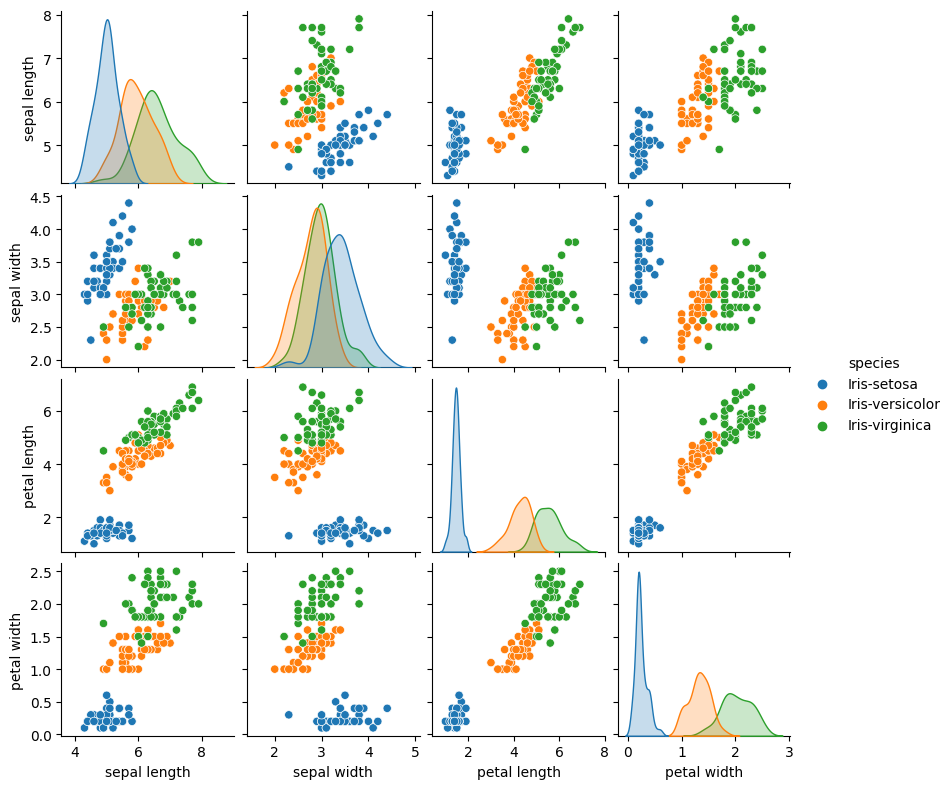

In [4]:
%matplotlib inline

import seaborn as sns
sns.pairplot(iris, hue='species', height=2);

## Preparing features and target
Store in X the content of `iris` excluding the column `species`. Verify the shape.

In [8]:
# X = iris.drop('species', axis=1)
X = iris.drop('species', axis=1)
X.shape

(150, 4)

In [9]:
X.head()

sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

Store in `y` the column `species` of `iris`. Verify the shape

In [11]:
y = iris['species']
y.shape

(150,)

### Supervised learning example: Iris classification

Let's take a look at another example of this process, using the Iris dataset we discussed earlier.
Our question will be this: given a model trained on a portion of the Iris data, how well can we predict the remaining labels?

For this task, we will use the _Decision Tree_ algorithm, with the standard parameter values.
We would like to evaluate the model on data it has not seen before, and so we will split the data into a *training set* and a *testing set*.
This could be done by hand, but it is more convenient to use the ``train_test_split`` utility function

1. Import the method `train_test_split` from `sklearn.model_selection`<br>
2. Generate the variables `Xtrain, Xtest, ytrain, ytest` by calling the function `train_test_split` with parameters `X` and `y`, and the additional parameter `random_state = 1`<br>
3. Show the shape of the resulting variables<br>


--> insert your code in a new cell below this one

In [12]:
train_size = 0.75

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1, train_size = train_size)
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

(112, 4) (38, 4) (112,) (38,)


With the data arranged, we can follow our recipe to predict the labels:
1. choose the model class, it will be `DecisionTreeClassifier`, imported from `sklearn.tree`<br>
2. instantiate the `model` as a `DecisionTreeClassifier` whithout any hyperparameter, we will use the defaults<br>
3. fit the `model` to data, calling its method `fit` with parameters `Xtrain, ytrain`<br>
4. predict the target `ytrain_model` using the `predict` method of `model` on the `Xtrain` data

--> insert your code in a new cell below this one

In [35]:
from sklearn.tree import DecisionTreeClassifier       # 1. choose model class
model = DecisionTreeClassifier(criterion = 'entropy', max_depth= 5) # 2. instantiate model
model.fit(Xtrain, ytrain)                             # 3. fit model to data
ytrain_model = model.predict(Xtrain)                  # 4. fir model to training data

We can use the ``accuracy_score`` utility to see the fraction of predicted training set labels that match their true value.

Import the `accuracy_score` from `sklearn.metrics` and call it on `ytrain, ytrain_model`

--> insert your code in a new cell below this one

In [36]:
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(ytrain, ytrain_model)
print("The accuracy on training set is {0:.2f}%".format(accuracy_train * 100))

The accuracy on training set is 100.00%


Finally, predict the new target `ytest_model` using the `predict` method of `model` on the `Xtest` data, then compute the accuracy on the test set

--> insert your code in a new cell below this one

In [34]:
ytest_model = model.predict(Xtest)                  # 4. predict on new data
accuracy_test = accuracy_score(ytest, ytest_model)
print("The accuracy on test set is {0:.2f}%".format(accuracy_test * 100))

The accuracy on test set is 97.37%


## Show the Decision Tree


To show the Decision Tree we will need a few imports

`from matplotlib import pyplot`<br>
`from sklearn.tree import plot_tre`<br>
`from matplotlib.pyplot import figure`

We will start setting the _figure size_ with the `figure` function, taking as argument `figsize` and a list of two values in inches, try and error for the measures you like.

We will then use the `plot_tree` function of `sklearn.tree`. It takes as argument the *fitted model*\, in our case `model` and several arguments to control how the tree is displayed.

I suggest the arguments below, you can try freely configurations and omissions of the parameters, to use the defaults. The parameters must follow the model variable and be separated by commas, the order is not relevant, since the parameters are named.

`filled=True`<br>
`feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width']`<br>
`class_names = ['setosa', 'versicolor', 'virginica']`<br>
`rounded = True`<br>
`proportion = True`<br>

--> insert your code in a new cell below this one

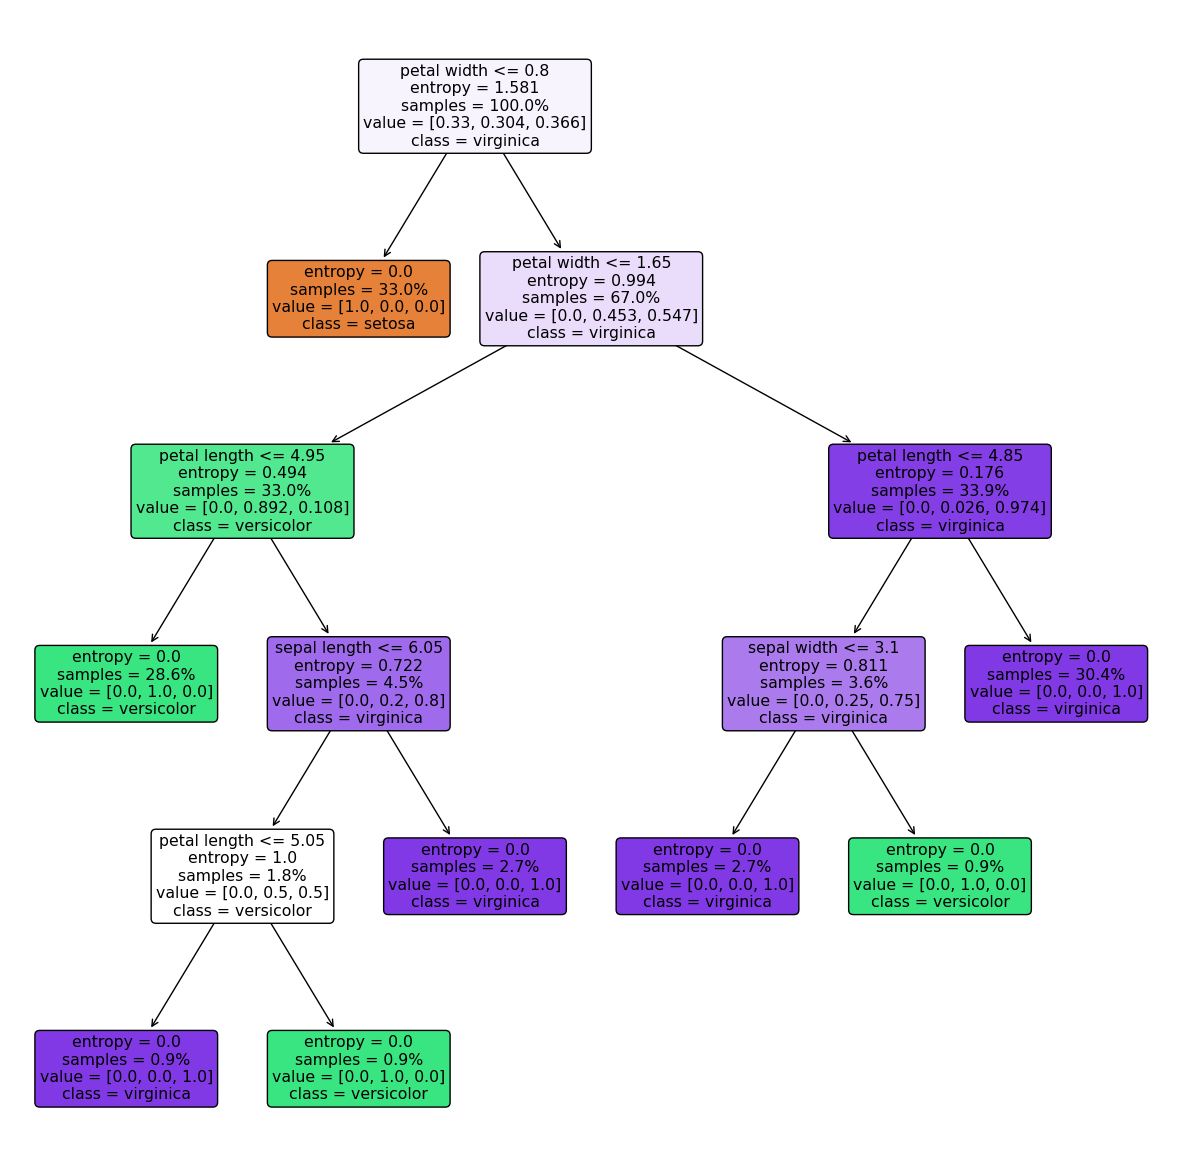

In [17]:
from matplotlib import pyplot
from sklearn.tree import plot_tree
from matplotlib.pyplot import figure
figure(figsize = (15,15))
plot_tree(model
#          , fontsize=6
          , filled=True
          , feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
          , class_names = ['setosa', 'versicolor', 'virginica']
          , rounded = True
          , proportion = True
         );

# Random Forest Classification

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
model_RF = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth= 5)
model_RF.fit(Xtrain, ytrain)
ytrain_model_RF = model_RF.predict(Xtrain)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(ytrain, ytrain_model_RF)
print("The accuracy on training set is {0:.2f}%".format(accuracy_train * 100))

The accuracy on training set is 99.11%


In [31]:
ytest_model_RF = model_RF.predict(Xtest)
accuracy_test = accuracy_score(ytest, ytest_model_RF)
print("The accuracy on test set is {0:.2f}%".format(accuracy_test * 100))

The accuracy on test set is 97.37%
